<a href="https://it-omscholing.nl/locaties/hogeschool-rotterdam/">
<div>
<a><img src='../../pics/banner.PNG'/></a>
</div>
<div>
<a href=''><img src='../../pics/miw.PNG'/></a>
</div>
</a>

# Practicum Convolution Neural Nets (CNN) Deel 1

**Doel: Toepassen Convolutional Neural Networks**

### Imports

In [25]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import torchvision
import torchvision.transforms.functional as F
import torchvision.transforms as T
from torchvision.io import ImageReadMode, read_image
from torch import nn
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import torch.nn.functional as F
from torchvision import transforms
from PIL import Image
import glob

<h3>Globale variabelen</h3>

In [35]:
forestDirectory = '../../pics/2750/Forest'
forest_images = glob.glob(forestDirectory + '/*.jpg')

industrialDirectory = '../../pics/2750/Industrial'
industrial_images = glob.glob(industrialDirectory + '/*.jpg')

### Context

<p>
Dit practicum bestaat uit twee onderdelen
<ol>
    <li>Het toepassen van een convolutie en pooling filter</li>
    <li><b>Het bouwen en trainen van een eenvoudig convolutional neural net dat een industrieterrein van een bos kan onderscheiden.</b></li>
</ol>    
Voor beide oefeningen gebruiken we de EuroSAT_RGB dataset
</p>

<img src='../../pics/eurosat_cnn.png' length=65% width=65%>

<h3>Data Collection</h3>
<p>
We gebruiken Images uit de <a href="https://github.com/phelber/EuroSAT">EuroSat dataset</a> die gemaakt zijn met de Sentinel-2 sateliet. Elke image is een 64x64 pixels foto van Europees aardoppervlak op een hoogte van 10 meter. De images zijn te categoriseren in Highway, Industrial, Pasture, PermanentCrop, Residential, River en SeaLake.
</p>
<img src=../../pics/eurosat_overview_small.jpg length=40% width=40%>
<p>
Download <a href="http://madm.dfki.de/files/sentinel/EuroSAT.zip">EuroSAT.zip</a> en kopieer daaruit de directory 2750 naar opdrachten/practica/pics.      
<strong>Voeg het pad naar de directory 2750 toe aan .gitignore zodat je de plaatjes niet naar je remote git repository pusht</strong>
</p>    

## Opdrachten

### Opdracht 3: pooling uitvoeren

Met PyTorch Functional kunnen we ook een pooling filter toepassen.

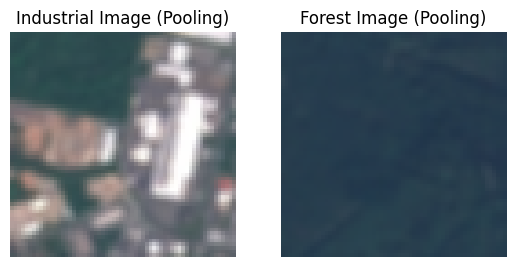

In [38]:

# a. Choose the correct avg-variant for pooling
pooling_type = nn.AvgPool2d

# b. Apply pooling to the 'Industrial_1.jpg' image
# c. Choose a 3x3 kernel and a stride of 1
image_path = '../../pics/2750/Industrial/Industrial_1.jpg'
image = Image.open(image_path).convert("RGB")
transform = T.ToTensor()
image = transform(image)
pool = pooling_type(kernel_size=3, stride=1)
output = pool(image.unsqueeze(0))

# d. Repeat the above steps for a random Forest Image
forest_image_path = '../../pics/2750/Forest/Forest_1.jpg'
forest_image = Image.open(forest_image_path).convert("RGB")
forest_image = transform(forest_image)
output_forest = pool(forest_image.unsqueeze(0))

# Convert output tensors to images for visualization
output_image = output.squeeze(0).permute(1, 2, 0).numpy()
output_forest_image = output_forest.squeeze(0).permute(1, 2, 0).numpy()

# Display the images
plt.subplot(1, 2, 1)
plt.imshow(output_image)
plt.title('Industrial Image (Pooling)')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(output_forest_image)
plt.title('Forest Image (Pooling)')
plt.axis('off')

plt.show()


### Reflectie

Komt de visuele uitkomst overeen met je verwachtingen?

In [ ]:
# Extra: varieer de stride en de kernel

### Reflectie

Wat is de invloed van padding en stride op de uitkomst?

### Opdracht 4: convolutie en pooling combineren

Een convolutional neural net combineert afwisselend convolutie en pooling in de eerste lagen.

We kunnen nu het effect van deze combinatie onderzoeken:

- Convolutie
- Pooling

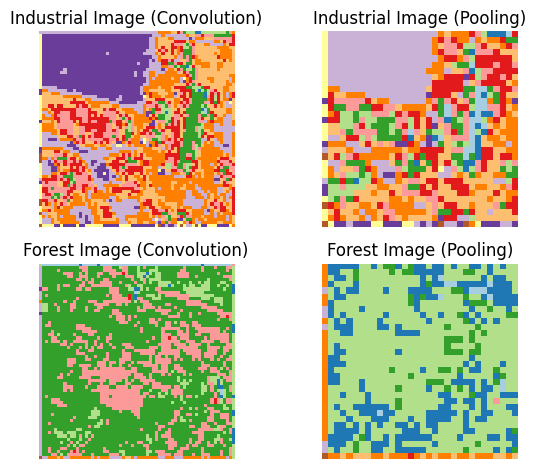

In [28]:
# a. Define your own 2D convolution filter
conv_filter = torch.tensor([[1, 0, -1],
                            [2, 0, -2],
                            [1, 0, -1]])

# b. Define your own 2D pooling filter
pool_filter = nn.MaxPool2d(kernel_size=2)

# c. Apply convolution to 'Industrial_1.jpg'
image_path = '../../pics/2750/Industrial/Industrial_1.jpg'
image = Image.open(image_path).convert("RGB")
transform = T.ToTensor()
image = transform(image)
conv = nn.Conv2d(in_channels=3, out_channels=1, kernel_size=3, stride=1, padding=1)
output_conv = conv(image.unsqueeze(0))

# d. Apply pooling to the output of convolution
output_pool = pool_filter(output_conv)

# e. Repeat the above steps for the 'Forest_1.jpg' image
forest_image_path = '../../pics/2750/Forest/Forest_1.jpg'
forest_image = Image.open(forest_image_path).convert("RGB")
forest_image = transform(forest_image)
output_conv_forest = conv(forest_image.unsqueeze(0))
output_pool_forest = pool_filter(output_conv_forest)

# Convert output tensors to images for visualization
output_conv_image = output_conv.squeeze(0).squeeze(0).detach().numpy()
output_pool_image = output_pool.squeeze(0).squeeze(0).detach().numpy()
output_conv_forest_image = output_conv_forest.squeeze(0).squeeze(0).detach().numpy()
output_pool_forest_image = output_pool_forest.squeeze(0).squeeze(0).detach().numpy()

# Display the images
plt.subplot(2, 2, 1)
plt.imshow(output_conv_image, cmap='Paired')
plt.title('Industrial Image (Convolution)')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(output_pool_image, cmap='Paired')
plt.title('Industrial Image (Pooling)')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(output_conv_forest_image, cmap='Paired')
plt.title('Forest Image (Convolution)')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(output_pool_forest_image, cmap='Paired')
plt.title('Forest Image (Pooling)')
plt.axis('off')

plt.tight_layout()
plt.show()


### Reflectie

- Verschilt de uitkomst veel van de combinatie veel met convolutie en pooling?
- En zijn de afbeeldingen 'Industrial_1.jpg' en 'Forrest_1.jpg' beter te onderscheiden?

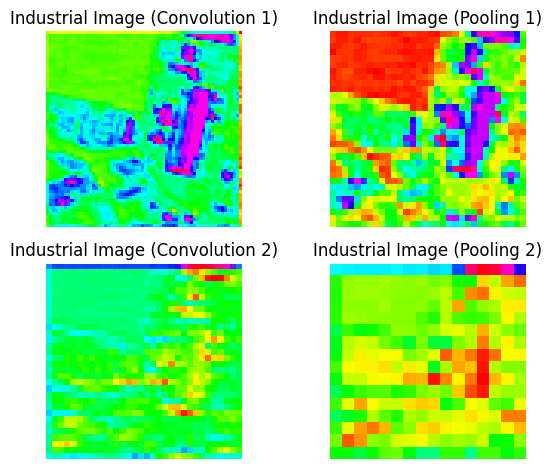

In [29]:
# Extra: bereid de combinatie uit met nog een extra convolutie en pooling laag

# Define the convolution and pooling filters
conv_filter1 = torch.tensor([[1, 0, -1],
                             [2, 0, -2],
                             [1, 0, -1]])

conv_filter2 = torch.tensor([[0, 1, 0],
                             [1, -4, 1],
                             [0, 1, 0]])

pool_filter = nn.MaxPool2d(kernel_size=2)

# Apply the convolution and pooling layers
image_path = '../../pics/2750/Industrial/Industrial_1.jpg'
image = Image.open(image_path).convert("RGB")
transform = T.ToTensor()
image = transform(image)

conv1 = nn.Conv2d(in_channels=3, out_channels=1, kernel_size=3, stride=1, padding=1)
output_conv1 = conv1(image.unsqueeze(0))

pool1 = pool_filter(output_conv1)

conv2 = nn.Conv2d(in_channels=1, out_channels=1, kernel_size=3, stride=1, padding=1)
output_conv2 = conv2(pool1)

pool2 = pool_filter(output_conv2)

# Convert output tensors to images for visualization
output_conv1_image = output_conv1.squeeze(0).squeeze(0).detach().numpy()
output_pool1_image = pool1.squeeze(0).squeeze(0).detach().numpy()
output_conv2_image = output_conv2.squeeze(0).squeeze(0).detach().numpy()
output_pool2_image = pool2.squeeze(0).squeeze(0).detach().numpy()

# Display the images
plt.subplot(2, 2, 1)
plt.imshow(output_conv1_image, cmap='hsv')
plt.title('Industrial Image (Convolution 1)')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(output_pool1_image, cmap='hsv')
plt.title('Industrial Image (Pooling 1)')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(output_conv2_image, cmap='hsv')
plt.title('Industrial Image (Convolution 2)')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(output_pool2_image, cmap='hsv')
plt.title('Industrial Image (Pooling 2)')
plt.axis('off')

plt.tight_layout()
plt.show()


### Reflectie

Heeft een extra laag veel invloed op de onderscheidbaarheid van de afbeeldingen?

Ja

### Opdracht 5: dataset prepareren

Om het neurale netwerk te trainen moeten we de dataset opsplitsen in labels (Y, de categoriën) en input afbeeldingen (X).

# a. Denk nog eens terug aan hoe we kruisjes van rondjes van elkaar konden onderscheiden
We gebruikten numerieke waarden om de labels te representeren. Bijvoorbeeld, we konden kruisjes representeren als 0 en rondjes als 1.
We representeren de kruisjes en rondjes als afbeeldingen. Deze afbeeldingen kunnen worden omgezet naar numerieke representaties zoals tensors of NumPy-arrays.
Om dit tot een dataset te combineren, hebben we elke afbeelding gekoppeld aan het bijbehorende label. Dus voor elke kruisjesafbeelding associeerden we het label 0, en voor elke rondjesafbeelding associeerden we het label 1.

# b. Hoe kunnen we de labels 'Industrials' en 'Forrest' dus representeren?
Om de labels 'Industrials' en 'Forrest' te representeren, kunnen we vergelijkbare numerieke waarden gebruiken. Bijvoorbeeld, we kunnen 'Industrials' representeren als 0 en 'Forrest' als 1.


In [30]:
# c. Vorm nu een dataset voor 'Industrials' en 'Forrest'
industrial_images = [...]  # List of industrial images
forest_images = [...]      # List of forest images

industrial_labels = [0] * len(industrial_images)  # Label 0 for industrial
forest_labels = [1] * len(forest_images)          # Label 1 for forest

X = industrial_images + forest_images       # Combined list of images
Y = industrial_labels + forest_labels       # Combined list of labels

In [36]:
print(forest_images)
print(industrial_images)

['../../pics/2750/Forest\\Forest_1.jpg', '../../pics/2750/Forest\\Forest_10.jpg', '../../pics/2750/Forest\\Forest_100.jpg', '../../pics/2750/Forest\\Forest_1000.jpg', '../../pics/2750/Forest\\Forest_1001.jpg', '../../pics/2750/Forest\\Forest_1002.jpg', '../../pics/2750/Forest\\Forest_1003.jpg', '../../pics/2750/Forest\\Forest_1004.jpg', '../../pics/2750/Forest\\Forest_1005.jpg', '../../pics/2750/Forest\\Forest_1006.jpg', '../../pics/2750/Forest\\Forest_1007.jpg', '../../pics/2750/Forest\\Forest_1008.jpg', '../../pics/2750/Forest\\Forest_1009.jpg', '../../pics/2750/Forest\\Forest_101.jpg', '../../pics/2750/Forest\\Forest_1010.jpg', '../../pics/2750/Forest\\Forest_1011.jpg', '../../pics/2750/Forest\\Forest_1012.jpg', '../../pics/2750/Forest\\Forest_1013.jpg', '../../pics/2750/Forest\\Forest_1014.jpg', '../../pics/2750/Forest\\Forest_1015.jpg', '../../pics/2750/Forest\\Forest_1016.jpg', '../../pics/2750/Forest\\Forest_1017.jpg', '../../pics/2750/Forest\\Forest_1018.jpg', '../../pics/2750/

In [ ]:
# d. Extra: implementeer bovenstaande via een Dataset en DataLoader class
#           (zie https://pytorch.org/docs/stable/data.html voor verdere details)

#import torch
#from torch.utils.data import Dataset, DataLoader

class ImageDataset(Dataset):
    def __init__(self, images, labels):
        self.images = images
        self.labels = labels
    
    def __len__(self):
        return len(self.images)
    
    def __getitem__(self, index):
        image = self.images[index]
        label = self.labels[index]
        return image, label

# Create the dataset
dataset = ImageDataset(images, labels)

# Create a dataloader
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

### Opdracht 6: CNN ontwerpen

We kunnen een convolutional neural net opbouwen met convolutie, pooling en fully connected lagen. Hieronder definiëren we een topologie om een afbeeldingen van 32 x 32 te onderscheiden.

De topologie is gebaseerd op de blog post 'A simple CNN with Pytorch'. Dus zie het artikel voor extra details.

In [ ]:
#De gegeven code definieert een CNN (Convolutional Neural Network) model met meerdere lagen
#-------------------------------------------------------

class CNN(nn.Module):
    
    #-------------------------------------------------------
    
    def __init__(self):
        
        # Because we inherit from Module base class
        super().__init__()
        
        # RGB input, 6 filters, kernel of 5 x 5
        # self.conv1 is de eerste convolutielaag met 3 invoerkanalen (RGB) en 6 uitvoerkanalen. Het gebruikt een 5x5 filter.
        self.conv1 = nn.Conv2d(3, 6, 5)
        
        # Filter is 2 x 2 with a stride of 2 (defined once, used two times)
        self.pool = nn.MaxPool2d(2, 2)
        
        # in_channels = 6 because self.conv1 output has 6 channels
        # self.conv2 is de tweede convolutielaag met 6 invoerkanalen (output van self.conv1) en 16 uitvoerkanalen. 
        # Het gebruikt ook een 5x5 filter.
        self.conv2 = nn.Conv2d(6, 16, 5)
        
        # Fully connected layer matched on output of conv2 layer
        # Dit komt omdat de uitvoer van de laatste convolutielaag, die in het model wordt gevoed, een grootte heeft van 16 x 5 x 5. 
        # Dit betekent dat er 16 kanalen zijn met elk een grootte van 5x5.
        # 120 is een willekeurig gekozen grootte en kan worden aangepast afhankelijk van de specificaties van het probleem.
        # Kortom, de lijn self.fc1 = nn.Linear(16 * 5 * 5, 120) definieert een lineaire laag met 1655 invoerkenmerken en 120 uitvoerkenmerken. 
        # Het doel van deze laag is om de kenmerken van de convolutielagen om te zetten naar een nieuwe representatie 
        # die geschikt is voor verdere verwerking in het model.

        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        
        # Fully connected layer
        self.fc2 = nn.Linear(120, 84)
        
        # We only have 2 labels
        self.fc3 = nn.Linear(84, 2)
        
    #-------------------------------------------------------
        
    def forward(self, x):
        
        # Convolution with relu layers
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        
        # To match the output of the conv2 layer onto the first fully connected layer
        # Like reshape() but makes no copy (reuses underlaying data)
        x = x.view(-1, 16 * 5 * 5)
        
        # Fully connected layers
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        
        # No activation on final layer 
        return self.fc3(x)

#-------------------------------------------------------
#Het gedefinieerde model heeft dus convolutie-, pooling- en volledig verbonden lagen. 
# De forward-methode definieert de stroom van gegevens door deze lagen tijdens de voorwaartse propagatie. 
#Dit model kan worden gebruikt voor classificatie van gegevens met 2 labels.

### Opdracht 7: CNN trainen

Het trainen van een CNN is identiek aan het trainen van een fully connected (a.k.a. dense) netwerk.

In [ ]:
#convolution-nu
# a. Ga voor jezelf na welke stappen een typisch trainingsproces bevat

#Een typisch trainingsproces voor een CNN omvat de volgende stappen:

#1. Dataset laden: Laad de trainingsdataset en de validatiedataset. Dit omvat het inladen van de afbeeldingen en het bijbehorende label.

#2. Data voorbereiden: Transformeer de ingeladen afbeeldingen en labels naar een geschikt formaat voor training. 
#   Dit kan onder andere het toepassen van data-augmentatie, normalisatie en het omzetten naar tensorformaten omvatten.

#3. Model bouwen: Definieer en initialiseer het CNN-model. Dit omvat het definiëren van de architectuur, de lagen, en de parameters van het netwerk.

#4. Loss-functie en optimizer: Kies een geschikte loss-functie om de voorspellingen van het model te vergelijken met de werkelijke labels. Selecteer ook een optimizer om de parameters van het model bij te werken tijdens het trainingsproces.

#5. Training loop: Itereer over de trainingsdataset en voer de volgende stappen uit:
#    Voer een voorwaartse propagatie uit: Stuur de invoerdata door het model en verkrijg de voorspellingen.
#    Bereken de loss: Vergelijk de voorspellingen met de werkelijke labels en bereken de loss-waarde.
#    Voer een achterwaartse propagatie uit: Bereken de gradiënten van de loss-waarde ten opzichte van de parameters van het model.
#    Update de parameters: Gebruik de optimizer om de parameters van het model bij te werken op basis van de berekende gradiënten.
#    Herhaal deze stappen voor meerdere epochs.

#6. Validatie: Na elke epoch of een bepaald aantal iteraties, evalueer het model op de validatiedataset. Bereken de accuratesse en de loss-waarde om de prestaties van het model te beoordelen en eventuele overfitting te controleren.

#7. Testen: Na het voltooien van het trainingsproces, evalueer het getrainde model op een aparte testdataset om de prestaties op ongeziene gegevens te meten.

#8. Fine-tuning en optimalisatie: Indien nodig kunnen verdere fine-tuning en optimalisatietechnieken worden toegepast, zoals het aanpassen van de leersnelheid, het gebruik van reguliere termen, het toepassen van dropout, enzovoort.

#9. Opslaan van het getrainde model: Sla het getrainde model op voor toekomstig gebruik en implementatie.

# b. Bekijk de blog post 'A simple CNN in Python' en zet de training op

# c. Het voorbeeld bevat geen validatie tijdens de trainingsstap (epoch)

#    - Bekijk het Notebook met de de postcode FastScan
#      en bereid de training uit met validatie in de trainingsloop

### Opdracht 8: dropout toevoegen

Om het netwerk effectiever te trainen wordt dropout toegepast.

PyTorch maakt het toevoegen van dropout makkelijk.

In [ ]:
# a. Bekijk het artikel Using Dropout Regularization in PyTorch Models (zie sources)

# b. Pas nu dropout toe op een hidden layer van je model

# c. Hertrain je model

#    - Let er op dat je je model evalueert in eval() mode
#    - Heeft de dropout invloed op de accuracy van je model?

### Reflectie

- Wat gebeurt er als de dropout groot is (bijvoobeeld 0.9)?

### Bronnen

[EuroSAT project](https://github.com/phelber/eurosat)

[Pytorch Neural Nets](https://pytorch.org/docs/stable/nn.html)

[Kernels](https://en.wikipedia.org/wiki/Kernel_(image_processing))

[A simple CNN with Pytorch](https://tomroth.com.au/pytorch-cnn)

[A guide to convolution arithmetic for deep learning](https://arxiv.org/pdf/1603.07285.pdf)

[Using Dropout Regularization in PyTorch Models](https://machinelearningmastery.com/using-dropout-regularization-in-pytorch-models)